In [10]:
# Import required libraries and dependencies
import pandas as pd
# import os
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import holoviews as hv

In [2]:
# ID feature is already dropped from cleaning notebook
# Define the paths for all source files
# cwd = os.getcwd()
# orig_test_data_path = os.path.join(cwd,'wine_data','test.csv')
# orig_train_data_path = os.path.join(cwd,'wine_data','train.csv')

# Open all source files as a pd dataframe
orig_test = pd.read_csv('https://project4-wine-quality-2023.s3.us-west-2.amazonaws.com/test.csv')
orig_train = pd.read_csv('https://project4-wine-quality-2023.s3.us-west-2.amazonaws.com/train.csv')
red_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/red_white_data_noID.csv')
white_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/white_data_noID.csv')
red_white_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/red_white_data_noID.csv')
trainable_data = pd.read_csv('https://raw.githubusercontent.com/Nicholas-Simpson/Project-4/main/Michael/trainable_data_noID.csv')


# Drop 'ID' columns
orig_test = orig_test.drop(columns='Id')
orig_train = orig_train.drop(columns='Id')

In [3]:
orig_scaled = pd.DataFrame(StandardScaler().fit_transform(orig_train),
                           columns= ['fixed acidity', 'volatile acidity', 
                                    'citric acid', 'residual sugar',
                                    'chlorides', 'free sulfur dioxide', 
                                    'total sulfur dioxide', 'density',
                                    'pH', 'sulphates', 'alcohol', 'quality'
                                    ])
red_scaled = pd.DataFrame(StandardScaler().fit_transform(red_data),
                          columns= ['fixed acidity', 'volatile acidity', 
                                    'citric acid', 'residual sugar',
                                    'chlorides', 'free sulfur dioxide', 
                                    'total sulfur dioxide', 'density',
                                    'pH', 'sulphates', 'alcohol', 'quality'
                                    ])
white_scaled = pd.DataFrame(StandardScaler().fit_transform(white_data),
                            columns= ['fixed acidity', 'volatile acidity', 
                                    'citric acid', 'residual sugar',
                                    'chlorides', 'free sulfur dioxide', 
                                    'total sulfur dioxide', 'density',
                                    'pH', 'sulphates', 'alcohol', 'quality'
                                    ])
redwhite_scaled = pd.DataFrame(StandardScaler().fit_transform(red_white_data),
                               columns= ['fixed acidity', 'volatile acidity', 
                                    'citric acid', 'residual sugar',
                                    'chlorides', 'free sulfur dioxide', 
                                    'total sulfur dioxide', 'density',
                                    'pH', 'sulphates', 'alcohol', 'quality'
                                    ])
all_scaled = pd.DataFrame(StandardScaler().fit_transform(trainable_data),
                          columns= ['fixed acidity', 'volatile acidity', 
                                    'citric acid', 'residual sugar',
                                    'chlorides', 'free sulfur dioxide', 
                                    'total sulfur dioxide', 'density',
                                    'pH', 'sulphates', 'alcohol', 'quality'
                                    ])

# Original Kaggle Compitition Data

In [4]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(orig_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k,
              "inertia" : inertia}

# Create a DataFrame with the data to plot the Elbow curve
# df_elbow = pd.DataFrame(elbow_data)
# df_elbow.head(10)

/Users/michaelnaffziger/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelnaffziger/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelnaffziger/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelnaffziger/opt/anaconda3/envs/dev/lib/python3.10/site-packages/

In [5]:
def calculate_inertia(df):
    k = list(range(1, 11))
    inertia_orig = []
    inertia_red = []
    inertia_white = []
    inertia_red_white = []
    inertia_all = []

    for i in k:
        k_model_orig = KMeans(n_clusters=i, random_state=42)
        k_model_orig.fit(df['orig'])
        inertia_orig.append(k_model_orig.inertia_)

        k_model_red = KMeans(n_clusters=i, random_state=42)
        k_model_red.fit(df['red'])
        inertia_red.append(k_model_red.inertia_)

        k_model_white = KMeans(n_clusters=i, random_state=42)
        k_model_white.fit(df['white'])
        inertia_white.append(k_model_white.inertia_)

        k_model_red_white = KMeans(n_clusters=i, random_state=42)
        k_model_red_white.fit(df['red_white'])
        inertia_red_white.append(k_model_red_white.inertia_)

        k_model_all = KMeans(n_clusters=i, random_state=42)
        k_model_all.fit(df['all'])
        inertia_all.append(k_model_all.inertia_)

    elbow_data = {
        "k": k,
        "inertia_orig": inertia_orig,
        "inertia_red": inertia_red,
        "inertia_white": inertia_white,
        "inertia_red_white": inertia_red_white,
        "inertia_all": inertia_all
    }

    df_elbow = pd.DataFrame(elbow_data)
    return df_elbow




In [6]:
df = {
    'orig': orig_scaled,
    'red': red_scaled,
    'white': white_scaled,
    'red_white': redwhite_scaled,
    'all': all_scaled
}

elbow_df_inertias = calculate_inertia(df)
elbow_df_inertias

/Users/michaelnaffziger/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelnaffziger/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelnaffziger/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michaelnaffziger/opt/anaconda3/envs/dev/lib/python3.10/site-packages/

,k,inertia_orig,inertia_red,inertia_white,inertia_red_white,inertia_all
0,1,24672.000000,77964.000000,58776.000000,77964.000000,102636.000000
1,2,20113.742431,62487.494752,47078.990224,62487.494752,78797.241927
2,3,17743.738811,51536.721856,43319.190812,51536.721856,66922.600622
3,4,16118.131018,46459.305397,40272.982035,46459.305397,58049.020139
4,5,15230.040802,43122.709101,37751.564917,43122.709101,54474.716958
5,6,14431.840135,40894.589684,35726.252291,40894.589684,51767.352569
6,7,13901.892696,39048.647203,34257.396444,39048.647203,49159.594312
7,8,13259.714593,37657.327898,33044.124659,37657.327898,47663.816845
8,9,12642.881802,36512.425450,31816.231725,36512.425450,45104.989978
9,10,12240.672562,35446.397306,30969.748970,35446.397306,43682.251219


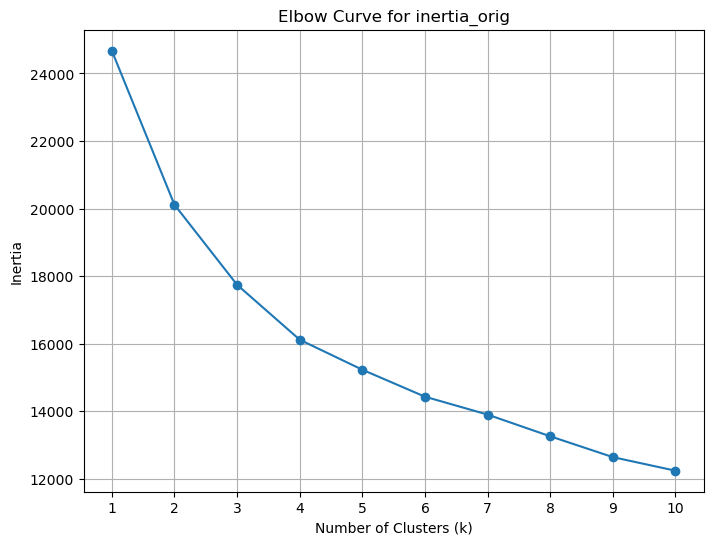

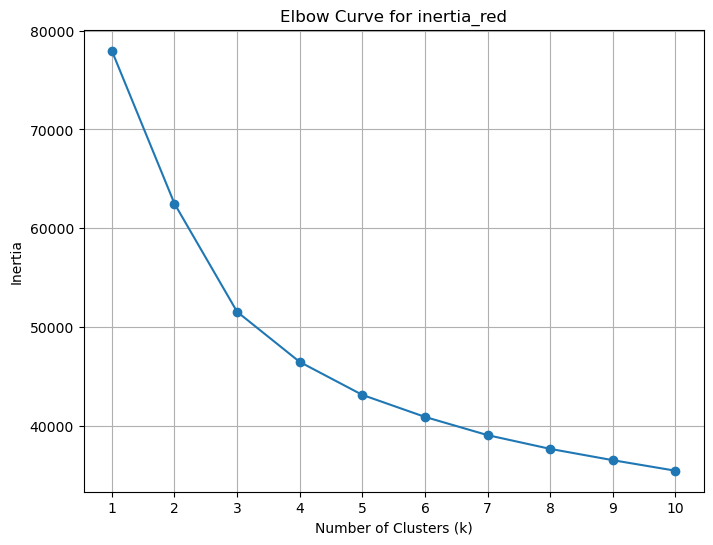

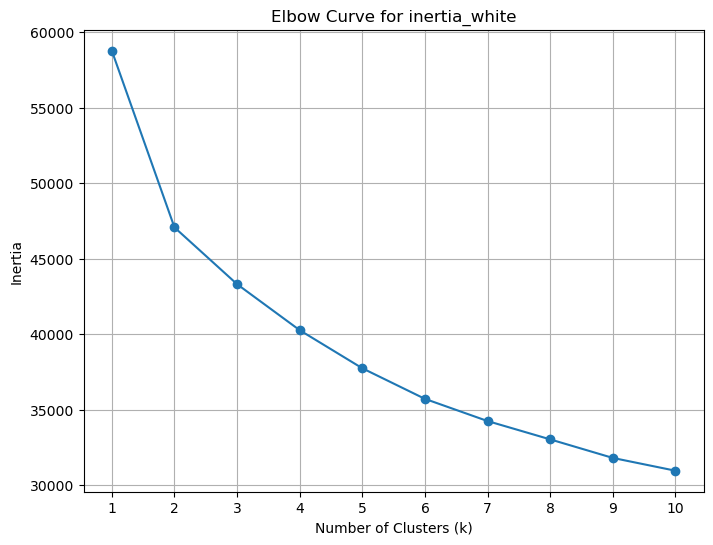

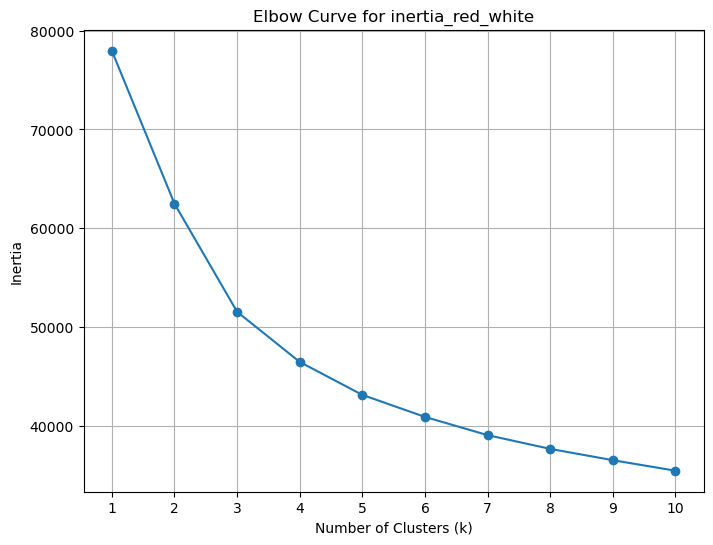

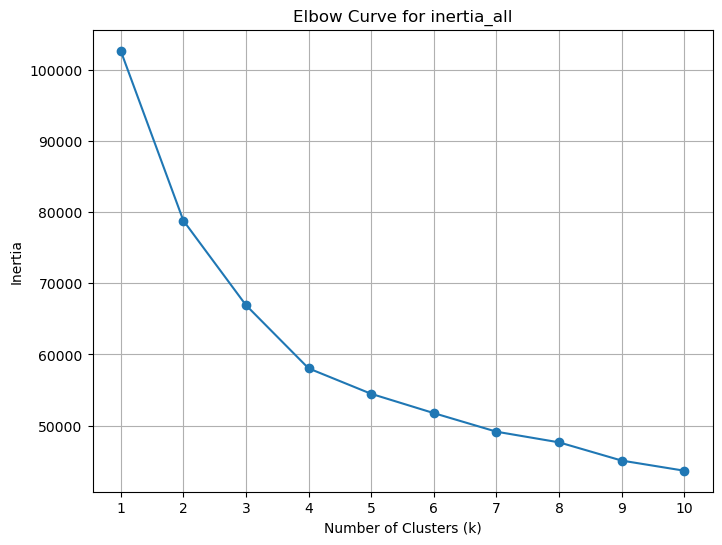

In [14]:

for col in inertia_columns:
    rows = len(inertia_columns)/2
    plt.figure(figsize=(8, 6))
    plt.plot(elbow_df_inertias["k"], elbow_df_inertias[col], marker='o')
    plt.title(f"Elbow Curve for {col}")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.xticks(elbow_df_inertias["k"])
    plt.grid(True)
    plt.show()

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=4)

# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
market_data_pca[:5]